Charger l'image.

(600, 440, 3)


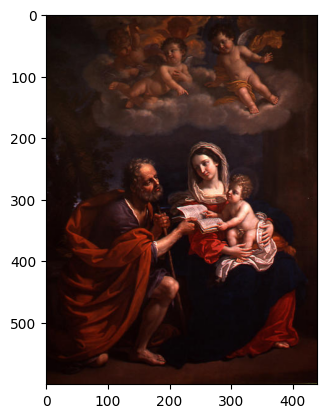

In [65]:
import skimage as ski
import matplotlib.pyplot as plt

image_path = "data/st jerome.jpg"

image = ski.io.imread(image_path)

plt.imshow(image)
print(image.shape)

In [66]:
# test_image = ski.color.rgb2gray(image) > ski.filters.threshold_otsu(ski.color.rgb2gray(image))
# plt.imshow(test_image, cmap="gray")

In [67]:
# image = ski.color.rgb2gray(image)
# plt.imshow(image, cmap="gray")

In [68]:
# image = ski.exposure.equalize_adapthist(image)
# plt.imshow(image, cmap="gray")

In [69]:
# for _ in range(5):
#     image = ski.restoration.denoise_bilateral(image, sigma_color=0.1, sigma_spatial=2)
# plt.imshow(image, cmap="gray")

Trouver les bords de l'image.

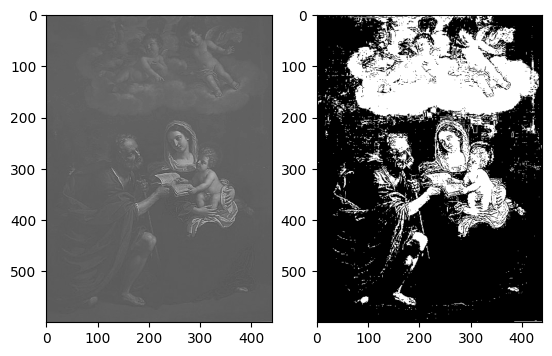

In [70]:
from fdog import difference_of_gaussians
import numpy as np

fig, axs = plt.subplots(1, 2)

low_sigma=1.27

dog_image = ski.color.rgb2gray(difference_of_gaussians(image, low_sigma, high_sigma=1.7*low_sigma, p=7.35))
axs[0].imshow(dog_image, cmap="gray")
thresh_image = dog_image > ski.filters.threshold_mean(dog_image)
axs[1].imshow(thresh_image, cmap="gray")

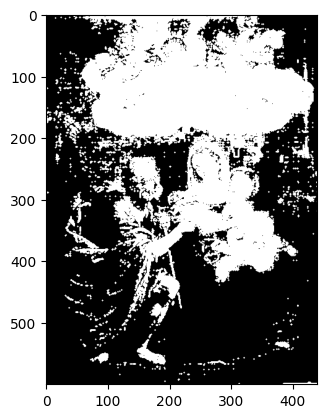

In [71]:
dilated_image = ski.morphology.dilation(thresh_image)
plt.imshow(dilated_image, cmap="gray")

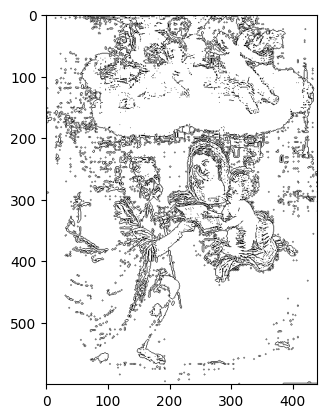

In [72]:
abs_diff = 1 - thresh_image ^ dilated_image
plt.imshow(abs_diff, cmap="gray")

In [73]:
abs_diff *= 255
abs_diff = abs_diff.astype(np.int8)

In [74]:
from subprocess import run

edge_image_path = image_path + "_edges.png"
thinned_edge_image_path = image_path + "_thinned.png"

ski.io.imsave(edge_image_path, abs_diff)
run(["./skeletonize_linux", "-i", edge_image_path, "-o", thinned_edge_image_path])

/tmp/ipykernel_38129/4084774403.py:6: UserWarning: data/famille.jpeg_edges.png is a low contrast image
  ski.io.imsave(edge_image_path, abs_diff)


CompletedProcess(args=['./skeletonize_linux', '-i', 'data/famille.jpeg_edges.png', '-o', 'data/famille.jpeg_thinned.png'], returncode=0)

Regrouper les bords de l'image en composantes connexes.

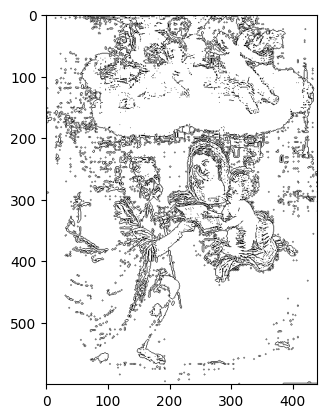

In [75]:
from edge_walker import group_edges
from utils import sort_edges


edge_image = ski.io.imread(thinned_edge_image_path)
plt.imshow(edge_image, cmap="gray")

In [76]:
edge_groups = sort_edges(group_edges(edge_image, min_edge_length=10, step=5))

In [77]:
print(len(edge_groups))

784


In [78]:
edge_group_lens = []
for g in edge_groups:
    edge_group_lens.append(len(g))

import seaborn as sns

sns.histplot(edge_group_lens, log_scale=True)
#hist = plt.hist(edge_group_lens)

ModuleNotFoundError: No module named 'seaborn'

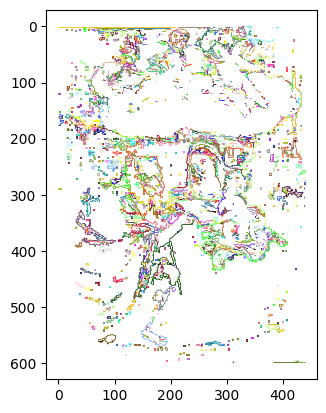

In [ ]:
import matplotlib.colors as mcolors
cs = list(mcolors.XKCD_COLORS.values())*1000


plt.gca().invert_yaxis()
for c, point_group in zip(cs, edge_groups):
    preceding_point = point_group[0]
    for p in point_group:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c=c, linewidth=0.5)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")

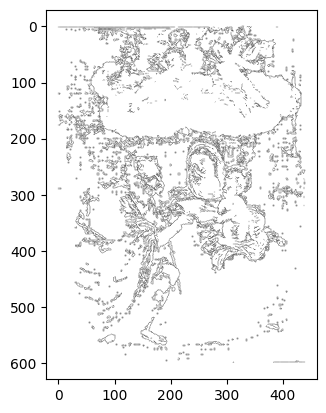

In [ ]:
plt.gca().invert_yaxis()
ids=0
for point_group in edge_groups:
    ids+=1
    preceding_point = point_group[0]
    for p in point_group:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c="black", linewidth=0.2)
        preceding_point = p.copy()


plt.gca().set_aspect("equal")

In [ ]:
import pickle

with open("psyche edges.pkl", "wb") as f:
    pickle.dump(edge_groups, f)
    f.close()